# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

# Ingest Data  

In [1407]:
data = pd.read_excel("World military power.xlsx")
df = data.copy()
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0


In [1408]:
df= df.rename(columns=df.iloc[0]).drop(df.index[0])

In [1409]:
df.insert(0, "country",df["Military Strength"])
df.head()

,country,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
2,Albania,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
3,Algeria,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
4,Angola,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
5,Argentina,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


In [1410]:
df.sample(5).T

,119,1,88,109,79
country,Syria,Afghanistan,North Korea,Somalia,Mozambique
Military Strength,Syria,Afghanistan,North Korea,Somalia,Mozambique
Military Strength Power Index,0.8241,1.3444,0.3718,4.6404,2.3364
Aircraft Strength,Syria,Afghanistan,North Korea,Somalia,Mozambique
Aircraft Strength value,456.0,260.0,949.0,0.0,16.0
...,...,...,...,...,...
Total Coastline Coverage value,193.0,0.0,2495.0,3025.0,2470.0
Total Waterway Coverage,Syria,Afghanistan,North Korea,Somalia,Mozambique
Total Waterway Coverage value,900.0,1200.0,2250.0,0.0,460.0
Total Border Coverage,Syria,Afghanistan,North Korea,Somalia,Mozambique


# EDA

In [1411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   country                                  138 non-null    object
 1   Military Strength                        138 non-null    object
 2   Military Strength Power Index            138 non-null    object
 3   Aircraft Strength                        138 non-null    object
 4   Aircraft Strength value                  138 non-null    object
 5   Fighter/Interceptor Strength             138 non-null    object
 6   Fighter/Interceptor Strength value       138 non-null    object
 7   Attack Aircraft Strength                 138 non-null    object
 8   Attack Aircraft Strength value           138 non-null    object
 9   Transport Aircraft Fleet Strength        138 non-null    object
 10  Transport Aircraft Fleet Strength value  138 non-null    objec

In [1412]:
df.shape

(138, 61)

In [1413]:
df.value_counts().sum()

98

In [1414]:
df.isna().sum().any()

True

In [1415]:
df.isnull().sum()

country                            0
Military Strength                  0
Military Strength Power Index      0
Aircraft Strength                  0
Aircraft Strength value            0
                                  ..
Total Coastline Coverage value    29
Total Waterway Coverage            0
Total Waterway Coverage value      0
Total Border Coverage              9
Total Border Coverage value        9
Length: 61, dtype: int64

## Implement basic steps to see how is your data looks like

In [1416]:
categoric = df.select_dtypes(include='object')
for col in categoric.columns:
    print(col)
    print(df[col].nunique())
    print("-------------")

country
138
-------------
Military Strength
138
-------------
Military Strength Power Index
138
-------------
Aircraft Strength
138
-------------
Aircraft Strength value
113
-------------
Fighter/Interceptor Strength
138
-------------
Fighter/Interceptor Strength value
63
-------------
Attack Aircraft Strength
138
-------------
Attack Aircraft Strength value
38
-------------
Transport Aircraft Fleet Strength
138
-------------
Transport Aircraft Fleet Strength value
49
-------------
Trainer Aircraft Fleet
138
-------------
Trainer Aircraft Fleet value
77
-------------
Helicopter Fleet Strength
138
-------------
Helicopter Fleet Strength value
97
-------------
Attack Helicopter Fleet Strength
138
-------------
Attack Helicopter Fleet Strength value
45
-------------
Tank Strength
138
-------------
Tank Strength value
106
-------------
AFV/APC Strength
138
-------------
AFV/APC Strength value
130
-------------
Self-Propelled Artillery Strength
138
-------------
Self-Propelled Artillery Str

In [1417]:
pd.DataFrame(df.nunique()).sort_values(by= 0,ascending= False).head(28)

,0
country,138
defense spending budget,138
External Debt,138
External Debt value,138
Airport Totals,138
Oil Production,138
Rocket Projector Strength,138
Oil Consumption,138
Towed Artillery Strength,138
Proven Oil Reserves,138


In [1418]:
df.drop(["Military Strength","Military Strength Power Index",
"External Debt",	
"Airport Totals",
"Oil Production",	
"Rocket Projector Strength",
"Oil Consumption",
"Towed Artillery Strength",	
"Proven Oil Reserves",
"Self-Propelled Artillery Strength",
"AFV/APC Strength",
"Available Manpower",
"Tank Strength",
"Available Manpower value",	
"Attack Helicopter Fleet Strength",
"Total Population",
"Helicopter Fleet Strength",
"Total Population value",
"Trainer Aircraft Fleet",
"Total Square Land Area",
"Transport Aircraft Fleet Strength",
"Total Square Land Area value",
"Attack Aircraft Strength",
"Total Waterway Coverage",
"Fighter/Interceptor Strength",
"Aircraft Strength",	
"defense spending budget"],axis=1, inplace=True)

In [1419]:
df.head(10)

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,"2,84,00,00,000",43.0,0.0,5500.0,0.0,Afghanistan,0.0,1200.0,Afghanistan,5987.0
2,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,"9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000",Albania,362.0,41.0,Albania,691.0
3,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,"6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000",Algeria,998.0,0.0,Algeria,6734.0
4,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,"42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000",Angola,1600.0,1300.0,Angola,5369.0
5,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,"2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000",Argentina,4989.0,11000.0,Argentina,11968.0
6,Armenia,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,...,"10,41,00,00,000",11.0,0.0,47500.0,0.0,NaN,NaN,0.0,Armenia,1570.0
7,Australia,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,...,"17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000",Australia,25760.0,2000.0,NaN,NaN
8,Austria,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,...,"6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000",NaN,NaN,0.0,Austria,2524.0
9,Azerbaijan,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,...,"17,41,00,00,000",37.0,"7,89,300","1,80,000","7,00,00,00,000",Azerbaijan,713.0,0.0,Azerbaijan,2468.0
10,Bahrain,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,...,"52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000",Bahrain,161.0,0.0,NaN,NaN


In [1420]:
pd.DataFrame(df.nunique()).sort_values(by= 0,ascending= False).head(28)

,0
country,138
External Debt value,138
AFV/APC Strength value,130
Total Border Coverage,129
Total Border Coverage value,125
Navy Fleet Strengths,124
defense spending budget value,124
Destroyer Fleet Strength,115
Frigate Fleet Strength,115
Aircraft Carrier Fleet Strength,115


## Convert multi index columns to one level

In [1421]:
df[["Total Coastline Coverage","Total Border Coverage"]].duplicated().sum()

0

In [1422]:
df[["Total Coastline Coverage","Total Border Coverage"]].isnull().value_counts()

Total Coastline Coverage  Total Border Coverage
False                     False                    100
True                      False                     29
False                     True                       9
dtype: int64

In [1423]:
df.shape

(138, 34)

In [1424]:
df = df.reset_index()  

## Detect and drop duplicated columns

In [1425]:
df.duplicated().sum()

0

## Check for missing values 

In [1426]:
df.head().T

,0,1,2,3,4
index,1,2,3,4,5
country,Afghanistan,Albania,Algeria,Angola,Argentina
Aircraft Strength value,260.0,19.0,551.0,295.0,227.0
Fighter/Interceptor Strength value,0.0,0.0,103.0,72.0,24.0
Attack Aircraft Strength value,25.0,0.0,22.0,18.0,7.0
Transport Aircraft Fleet Strength value,30.0,0.0,59.0,30.0,9.0
Trainer Aircraft Fleet value,0.0,0.0,87.0,47.0,64.0
Helicopter Fleet Strength value,187.0,19.0,257.0,126.0,100.0
Attack Helicopter Fleet Strength value,0.0,0.0,45.0,15.0,0.0
Tank Strength value,0.0,0.0,880.0,379.0,370.0


In [1427]:
df.isna().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Total Coastline Coverage                   29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Submarine Fleet Strength                   23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage                       9
Total Border Coverage value                 9
Rocket Projector Strength value             0
External Debt value                         0
Aircraft Strength value                     0
Total Waterway Coverage value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Proven Oil Reserves value                   0
Oil Consumption value             

In [1428]:
df["Total Border Coverage"].fillna(df["Total Coastline Coverage"],inplace= True)

In [1429]:
df["Total Border Coverage"].isnull().sum()

0

In [1430]:
df.drop(["Total Coastline Coverage"],axis=1 ,inplace= True)

In [1431]:
df.shape

(138, 34)

In [1432]:
df.isna().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Submarine Fleet Strength                   23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Total Border Coverage                       0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value               

In [1433]:
df.sample(3).T

,89,81,11
index,90,82,12
country,Norway,Nepal,Belarus
Aircraft Strength value,150.0,16.0,202.0
Fighter/Interceptor Strength value,59.0,0.0,39.0
Attack Aircraft Strength value,15.0,0.0,68.0
Transport Aircraft Fleet Strength value,4.0,3.0,4.0
Trainer Aircraft Fleet value,32.0,0.0,28.0
Helicopter Fleet Strength value,47.0,13.0,63.0
Attack Helicopter Fleet Strength value,0.0,0.0,21.0
Tank Strength value,52.0,0.0,532.0


-- In this search we saw that some of the columns have same values except NaN. So for these reason we decide to drop other columns and keep only one and before dropping we will fill NaN values with fillna :)

In [1434]:
df[["Navy Fleet Strengths","Aircraft Carrier Fleet Strength","Submarine Fleet Strength","Destroyer Fleet Strength","Frigate Fleet Strength","Total Border Coverage"]].sample(5)

,Navy Fleet Strengths,Aircraft Carrier Fleet Strength,Submarine Fleet Strength,Destroyer Fleet Strength,Frigate Fleet Strength,Total Border Coverage
47,Honduras,Honduras,Honduras,Honduras,Honduras,Honduras
50,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
133,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela,Venezuela
17,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
53,Ireland,Ireland,Ireland,Ireland,Ireland,Ireland


In [1435]:
df[["Navy Fleet Strengths","Aircraft Carrier Fleet Strength","Submarine Fleet Strength","Destroyer Fleet Strength","Frigate Fleet Strength","Total Border Coverage"]].isnull().sum()

Navy Fleet Strengths               14
Aircraft Carrier Fleet Strength    23
Submarine Fleet Strength           23
Destroyer Fleet Strength           23
Frigate Fleet Strength             23
Total Border Coverage               0
dtype: int64

We said that we will fill our NaN values with filLna but we saw that one of the columns has full values and this is good for our using not necessary to use fillna :)

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [1436]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Submarine Fleet Strength                   23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Total Border Coverage                       0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value               

In [1437]:
df.sample(5)

,index,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
94,95,Peru,273.0,17.0,38.0,40.0,77.0,99.0,16.0,146.0,...,"2,56,00,00,000","66,25,00,00,000",191.0,43520.0,"2,10,000","47,30,00,000",2414.0,8808.0,Peru,7062.0
100,101,Romania,143.0,26.0,0.0,12.0,41.0,62.0,0.0,943.0,...,"5,05,00,00,000","95,97,00,00,000",45.0,73740.0,"2,40,000","60,00,00,000",225.0,1731.0,Romania,2844.0
80,81,Namibia,30.0,6.0,0.0,3.0,14.0,7.0,2.0,7.0,...,"50,50,00,000","7,96,90,00,000",112.0,0.0,25000.0,0.0,1572.0,0.0,Namibia,4220.0
52,53,Iraq,348.0,26.0,33.0,16.0,102.0,186.0,40.0,309.0,...,"1,73,00,00,000","73,02,00,00,000",102.0,"44,54,000","8,25,000","1,42,50,00,00,000",58.0,5279.0,Iraq,3809.0
31,32,Democratic Republic of the Congo,53.0,2.0,4.0,13.0,0.0,34.0,8.0,175.0,...,"10,00,00,000","4,96,30,00,000",198.0,19160.0,10500.0,"18,00,00,000",37.0,15000.0,Democratic Republic of the Congo,10481.0


In [1438]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,138.0,69.5,39.981246,1.0,35.25,69.5,103.75,138.0


In [1439]:
df[["Navy Fleet Strengths","Aircraft Carrier Fleet Strength","Destroyer Fleet Strength","Total Border Coverage","Frigate Fleet Strength","Submarine Fleet Strength"]].isnull().sum().value_counts()

23    4
14    1
0     1
dtype: int64

In [1440]:
df[["Navy Fleet Strengths","Aircraft Carrier Fleet Strength","Destroyer Fleet Strength","Total Border Coverage","Frigate Fleet Strength","Submarine Fleet Strength"]].value_counts()

Navy Fleet Strengths  Aircraft Carrier Fleet Strength  Destroyer Fleet Strength  Total Border Coverage  Frigate Fleet Strength  Submarine Fleet Strength
Afghanistan           Afghanistan                      Afghanistan               Afghanistan            Afghanistan             Afghanistan                 1
Sierra Leone          Sierra Leone                     Sierra Leone              Sierra Leone           Sierra Leone            Sierra Leone                1
Saudi Arabia          Saudi Arabia                     Saudi Arabia              Saudi Arabia           Saudi Arabia            Saudi Arabia                1
Russia                Russia                           Russia                    Russia                 Russia                  Russia                      1
Romania               Romania                          Romania                   Romania                Romania                 Romania                     1
                                                         

In [1441]:
df["Total Border Coverage"].value_counts()

Afghanistan        1
Peru               1
North Macedonia    1
Norway             1
Oman               1
                  ..
France             1
Finland            1
Ethiopia           1
Estonia            1
Zimbabwe           1
Name: Total Border Coverage, Length: 138, dtype: int64

In [1442]:
df[["Total Border Coverage","Total Coastline Coverage value"]]

,Total Border Coverage,Total Coastline Coverage value
0,Afghanistan,0.0
1,Albania,362.0
2,Algeria,998.0
3,Angola,1600.0
4,Argentina,4989.0
...,...,...
133,Venezuela,2800.0
134,Vietnam,3444.0
135,Yemen,1906.0
136,Zambia,NaN


In [1443]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(12)

,0
Total Coastline Coverage value,29
Aircraft Carrier Fleet Strength value,23
Frigate Fleet Strength value,23
Frigate Fleet Strength,23
Destroyer Fleet Strength value,23
Destroyer Fleet Strength,23
Submarine Fleet Strength value,23
Submarine Fleet Strength,23
Aircraft Carrier Fleet Strength,23
Navy Fleet Strengths,14


In [1444]:
df.shape

(138, 34)

In [1445]:
df.drop(["Navy Fleet Strengths","Aircraft Carrier Fleet Strength","Destroyer Fleet Strength","Frigate Fleet Strength","Submarine Fleet Strength"],axis=1,inplace=True)

In [1446]:
df.shape

(138, 29)

In [1447]:
df.isnull().sum()

index                                       0
country                                     0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [1448]:
df[["Aircraft Carrier Fleet Strength value",
"Submarine Fleet Strength value",          
"Destroyer Fleet Strength value",           
"Frigate Fleet Strength value","Total Border Coverage value","Total Coastline Coverage value","Navy Fleet Strengths value"]].sample(5).T

,109,128,87,27,13
Aircraft Carrier Fleet Strength value,0.0,0.0,0.0,0.0,NaN
Submarine Fleet Strength value,3.0,0.0,83.0,11.0,NaN
Destroyer Fleet Strength value,0.0,0.0,0.0,0.0,NaN
Frigate Fleet Strength value,4.0,0.0,11.0,4.0,NaN
Total Border Coverage value,5244.0,1066.0,1607.0,6672.0,1136.0
Total Coastline Coverage value,2798.0,1318.0,2495.0,3208.0,NaN
Navy Fleet Strengths value,30.0,75.0,984.0,453.0,0.0


In [1449]:
df[["Total Border Coverage",
"Total Border Coverage value","Total Coastline Coverage value",
"Total Waterway Coverage value"]].sample(7)

,Total Border Coverage,Total Border Coverage value,Total Coastline Coverage value,Total Waterway Coverage value
57,Japan,NaN,29751.0,1770.0
106,Slovakia,1587.0,NaN,172.0
39,Finland,2563.0,1250.0,7842.0
100,Romania,2844.0,225.0,1731.0
84,Nicaragua,1253.0,910.0,2220.0
133,Venezuela,5267.0,2800.0,7100.0
137,Zimbabwe,3229.0,NaN,0.0


In [1450]:
df.sample(7).T

,40,31,11,77,30,76,66
index,41,32,12,78,31,77,67
country,France,Democratic Republic of the Congo,Belarus,Morocco,Czechia,Montenegro,Liberia
Aircraft Strength value,1229.0,53.0,202.0,214.0,95.0,9.0,0.0
Fighter/Interceptor Strength value,269.0,2.0,39.0,46.0,12.0,0.0,0.0
Attack Aircraft Strength value,0.0,4.0,68.0,0.0,16.0,0.0,0.0
Transport Aircraft Fleet Strength value,121.0,13.0,4.0,31.0,8.0,0.0,0.0
Trainer Aircraft Fleet value,187.0,0.0,28.0,67.0,15.0,0.0,0.0
Helicopter Fleet Strength value,589.0,34.0,63.0,64.0,44.0,9.0,0.0
Attack Helicopter Fleet Strength value,62.0,8.0,21.0,0.0,15.0,0.0,0.0
Tank Strength value,528.0,175.0,532.0,1443.0,116.0,0.0,0.0


In [1451]:
df[["defense spending budget value","Oil Production value","Oil Consumption value","Proven Oil Reserves value"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   defense spending budget value  138 non-null    object
 1   Oil Production value           138 non-null    object
 2   Oil Consumption value          138 non-null    object
 3   Proven Oil Reserves value      138 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


In [1452]:
df["defense spending budget values"]= df["defense spending budget value"].str.replace(',', '')

In [1453]:
df["Oil Production values"]= df["Oil Production value"].str.replace(',', '')

In [1454]:
df["Oil Consumption values"]= df["Oil Consumption value"].str.replace(',', '')

In [1455]:
df["Proven Oil Reserves values"]= df["Proven Oil Reserves value"].str.replace(',', '')

In [1456]:
df[["defense spending budget values","Oil Production values","Oil Consumption values","Proven Oil Reserves values"]].sample(5)

,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values
134,5500000000,271400,525000,4400000000
136,40000000,NaN,NaN,NaN
71,70000000,NaN,NaN,NaN
57,49000000000,NaN,4000000,44120000
14,660000000,NaN,NaN,211500000


In [1457]:
df.drop(["defense spending budget value","Oil Production value","Oil Consumption value","Proven Oil Reserves value"],axis=1, inplace=True)

In [1458]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,138.0,69.5,39.981246,1.0,35.25,69.5,103.75,138.0


In [1459]:
df.shape

(138, 29)

In [1460]:
df.isnull().sum()

index                                       0
country                                     0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
External Debt value                         0
Airport Totals value                        0
Total Coastline Coverage value    

- After converting coma to points our 0 values changed to NaN values. So we fill NaN with zero.s

In [1461]:
df[["Oil Production values"]].sample(7)

,Oil Production values
88,NaN
131,NaN
85,NaN
130,9352000
24,128000
92,NaN
78,NaN


In [1462]:
df["Oil Production values"].fillna(0, inplace = True)

In [1463]:
df[["Oil Production values"]].sample(7)

,Oil Production values
43,0
100,0
60,0
121,0
114,102300
133,2007000
111,150200


In [1464]:
df["Oil Consumption values"].fillna(0, inplace = True)

In [1465]:
df["Proven Oil Reserves values"].fillna(0, inplace = True)

In [1466]:
df.sample(5)

,index,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values
137,138,Zimbabwe,90.0,10.0,0.0,14.0,38.0,28.0,6.0,42.0,...,"9,35,70,00,000",196.0,NaN,0.0,Zimbabwe,3229.0,100000000,0,0,0
9,10,Bahrain,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,...,"52,15,00,00,000",4.0,161.0,0.0,Bahrain,NaN,1415000000,0,0,124600000
36,37,El Salvador,51.0,0.0,15.0,2.0,3.0,31.0,0.0,0.0,...,"15,51,00,00,000",68.0,307.0,0.0,El Salvador,590.0,167000000,0,0,0
129,130,United Kingdom,733.0,133.0,15.0,44.0,241.0,312.0,49.0,227.0,...,"81,26,00,00,00,000",460.0,12429.0,3200.0,United Kingdom,443.0,55100000000,910500,1600000,2564000000
28,29,Croatia,78.0,12.0,0.0,0.0,27.0,47.0,0.0,72.0,...,"48,10,00,00,000",69.0,5835.0,785.0,Croatia,2237.0,800000000,0,0,71000000


In [1467]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,138.0,69.5,39.981246,1.0,35.25,69.5,103.75,138.0


In [1468]:
df.isnull().sum().sort_values(ascending=False).head(7)

Total Coastline Coverage value           29
Aircraft Carrier Fleet Strength value    23
Frigate Fleet Strength value             23
Destroyer Fleet Strength value           23
Submarine Fleet Strength value           23
Navy Fleet Strengths value               14
Total Border Coverage value               9
dtype: int64

In [1469]:
k= df.loc[df.isnull().any(axis=1)]

In [1470]:
df[["Total Border Coverage","Total Coastline Coverage value",
"Aircraft Carrier Fleet Strength value",
"Submarine Fleet Strength value",     
"Frigate Fleet Strength value",        
"Destroyer Fleet Strength value",         
"Navy Fleet Strengths value",
"Total Border Coverage value"]].loc[df[["Total Border Coverage","Total Coastline Coverage value",
"Aircraft Carrier Fleet Strength value",
"Submarine Fleet Strength value",     
"Frigate Fleet Strength value",        
"Destroyer Fleet Strength value",         
"Navy Fleet Strengths value",
"Total Border Coverage value"]].isnull().any(axis=1)]

,Total Border Coverage,Total Coastline Coverage value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Frigate Fleet Strength value,Destroyer Fleet Strength value,Navy Fleet Strengths value,Total Border Coverage value
5,Armenia,NaN,NaN,NaN,NaN,NaN,0.0,1570.0
6,Australia,25760.0,2.0,6.0,8.0,2.0,48.0,NaN
7,Austria,NaN,NaN,NaN,NaN,NaN,0.0,2524.0
9,Bahrain,161.0,0.0,0.0,1.0,0.0,39.0,NaN
11,Belarus,NaN,NaN,NaN,NaN,NaN,0.0,3599.0
13,Bhutan,NaN,NaN,NaN,NaN,NaN,0.0,1136.0
14,Bolivia,NaN,0.0,0.0,0.0,0.0,173.0,7252.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,4347.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,3611.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,5920.0


In [1471]:
df[["Total Border Coverage","Total Coastline Coverage value",
"Aircraft Carrier Fleet Strength value",
"Submarine Fleet Strength value",     
"Frigate Fleet Strength value",        
"Destroyer Fleet Strength value",         
"Navy Fleet Strengths value"
]].fillna(0, inplace = True)

In [1472]:
df.isnull().sum().value_counts()

0     22
23     4
14     1
29     1
9      1
dtype: int64

In [1473]:
df["Navy Fleet Strengths value"].fillna(0, inplace = True)

In [1474]:
df["Frigate Fleet Strength value"].fillna(0, inplace = True)

In [1475]:
df["Destroyer Fleet Strength value"].fillna(0, inplace = True)

In [1476]:
df["Submarine Fleet Strength value"].fillna(0, inplace = True)

In [1477]:
df["Aircraft Carrier Fleet Strength value"].fillna(0, inplace = True)

In [1478]:
df["Total Coastline Coverage value"].fillna(0, inplace = True)

In [1479]:
df.isnull().sum().value_counts()

0    28
9     1
dtype: int64

In [1480]:
df[["Total Border Coverage","Total Border Coverage value"]].loc[df[["Total Border Coverage","Total Border Coverage value"]].isnull().any(axis=1)]

,Total Border Coverage,Total Border Coverage value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


In [1481]:
df.at[6,'Total Border Coverage value']=66530

In [1482]:
df.at[9,'Total Border Coverage value']=255

In [1483]:
df.at[57,'Total Border Coverage value']=29020

In [1484]:
df.at[69,'Total Border Coverage value']=9935

In [1485]:
df.at[83,'Total Border Coverage value']=17209

In [1486]:
df.at[95,'Total Border Coverage value']=33900

In [1487]:
df.at[105,'Total Border Coverage value']=268

In [1488]:
df.at[113,'Total Border Coverage value']=2825

In [1489]:
df.at[119,'Total Border Coverage value']=1566

In [1490]:
df[["Total Border Coverage","Total Border Coverage value"]].loc[df[["Total Border Coverage","Total Border Coverage value"]].isnull().any(axis=1)]

,Total Border Coverage,Total Border Coverage value


In [1491]:
df.drop("Total Border Coverage", axis=1, inplace= True)

In [1492]:
df[["Total Border Coverage value"]].loc[df[["Total Border Coverage value"]].isnull().any(axis=1)]

,Total Border Coverage value


In [1493]:
value_df= df.drop("country",axis=1)

In [1494]:
df.sample(2)

,index,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values
15,16,Bosnia and Herzegovina,19.0,0.0,0.0,0.0,0.0,19.0,0.0,320.0,...,0.0,"10,87,00,00,000",24.0,20.0,0.0,1543.0,165000000,0,0,0
61,62,Kuwait,85.0,27.0,0.0,2.0,13.0,40.0,16.0,367.0,...,0.0,"47,24,00,00,000",7.0,499.0,0.0,475.0,6831000000,2753000,345000,101500000000


In [1495]:
for col in df.columns[2:]:
    value_df[col]  = value_df[col].astype("str")
    value_df[col]  = value_df.select_dtypes("object")[col].str.replace(',','')
    value_df[col]  = value_df[col].astype("float")

## Fix the dtypes

In [1496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    138 non-null    int64  
 1   country                                  138 non-null    object 
 2   Aircraft Strength value                  138 non-null    object 
 3   Fighter/Interceptor Strength value       138 non-null    object 
 4   Attack Aircraft Strength value           138 non-null    object 
 5   Transport Aircraft Fleet Strength value  138 non-null    object 
 6   Trainer Aircraft Fleet value             138 non-null    object 
 7   Helicopter Fleet Strength value          138 non-null    object 
 8   Attack Helicopter Fleet Strength value   138 non-null    object 
 9   Tank Strength value                      138 non-null    object 
 10  AFV/APC Strength value                   138 non-n

Total Waterway Coverage value,Total Border Coverage value

In [1497]:
df.sample(10).T

,78,87,79,133,21,46,98,27,124,75
index,79,88,80,134,22,47,99,28,125,76
country,Mozambique,North Korea,Myanmar,Venezuela,Cameroon,Guatemala,Qatar,Colombia,Turkey,Mongolia
Aircraft Strength value,16.0,949.0,276.0,260.0,29.0,33.0,123.0,469.0,1055.0,9.0
Fighter/Interceptor Strength value,8.0,458.0,59.0,38.0,0.0,0.0,24.0,21.0,206.0,0.0
Attack Aircraft Strength value,0.0,114.0,21.0,0.0,0.0,4.0,6.0,38.0,0.0,0.0
Transport Aircraft Fleet Strength value,1.0,4.0,27.0,52.0,6.0,8.0,12.0,76.0,80.0,3.0
Trainer Aircraft Fleet value,1.0,169.0,82.0,82.0,6.0,6.0,35.0,80.0,276.0,0.0
Helicopter Fleet Strength value,6.0,204.0,86.0,86.0,15.0,15.0,46.0,224.0,497.0,6.0
Attack Helicopter Fleet Strength value,2.0,20.0,9.0,10.0,0.0,0.0,3.0,0.0,100.0,0.0
Tank Strength value,100.0,6045.0,434.0,390.0,0.0,12.0,92.0,0.0,2622.0,470.0


In [1498]:
df.isnull().sum()

index                                      0
country                                    0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
External Debt value                        0
Airport Totals value                       0
Total Coastline Coverage value             0
Total Wate

In [1499]:
df.drop("index",axis=1,inplace= True)

In [1500]:
df.sample(3)

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Frigate Fleet Strength value,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values
99,Republic of the Congo,13.0,2.0,0.0,3.0,0.0,8.0,1.0,86.0,225.0,...,0.0,"4,60,50,00,000",27.0,169.0,1120.0,5008.0,715000000,244200,185000,1600000000
132,Uzbekistan,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,1215.0,...,0.0,"16,90,00,00,000",53.0,420.0,1100.0,6893.0,975000000,0,142000,594000000
47,Honduras,46.0,3.0,9.0,11.0,10.0,12.0,0.0,19.0,92.0,...,0.0,"8,62,50,00,000",103.0,832.0,465.0,1575.0,205000000,0,0,0


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [1501]:
#yukarda dusurdummmm asagi alamam cok yoruldum bu nasil data...

## Visualy inspect the some features

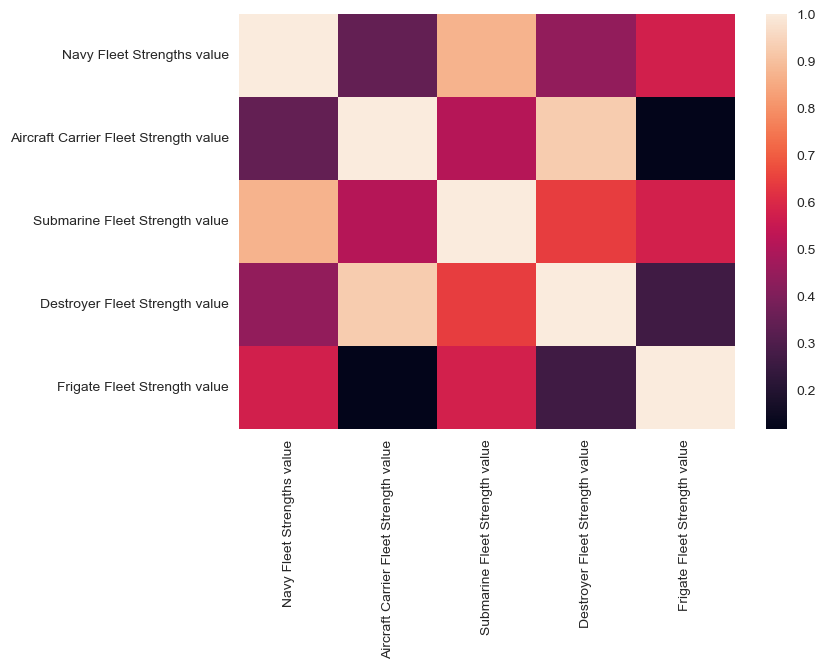

In [1502]:
sns.heatmap(df.corr());

In [1503]:
df.shape

(138, 27)

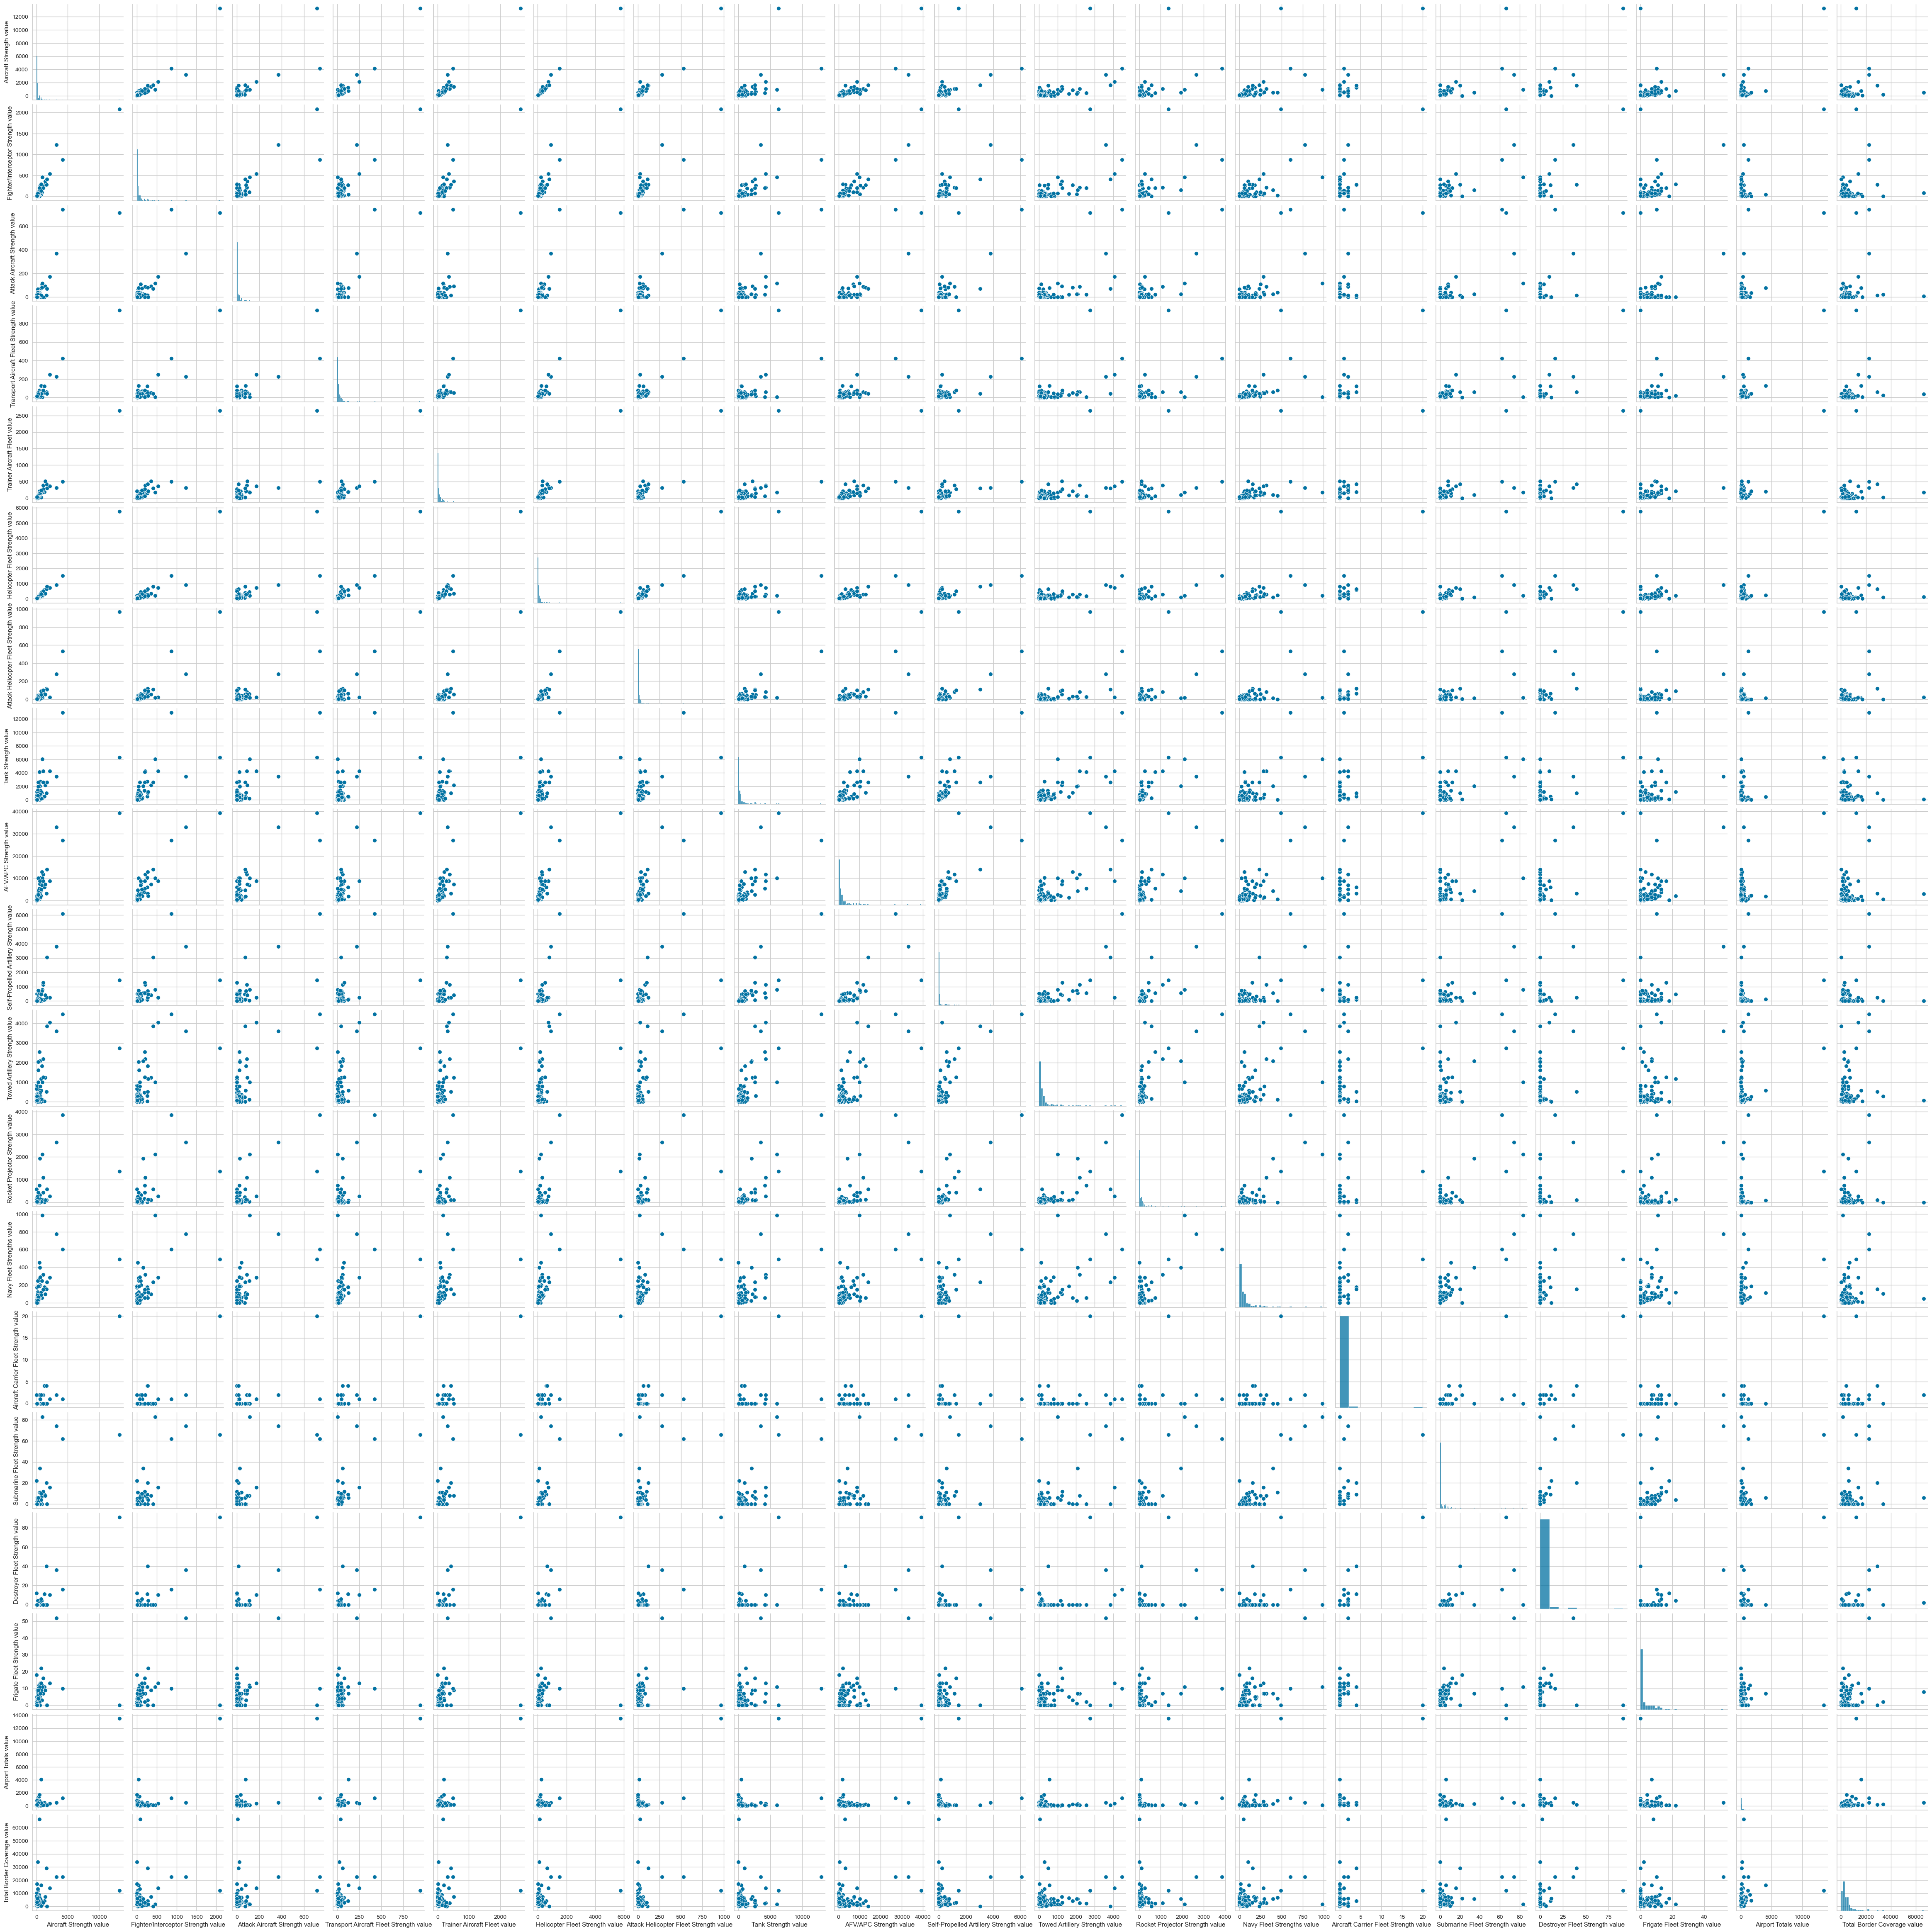

In [1504]:
sns.pairplot(df)
plt.show()

## Decriptive statistics

In [1505]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Navy Fleet Strengths value,138.0,76.362319,140.821984,0.0,5.25,30.0,72.75,984.0
Aircraft Carrier Fleet Strength value,138.0,0.318841,1.804235,0.0,0.00,0.0,0.00,20.0
Submarine Fleet Strength value,138.0,4.000000,12.631787,0.0,0.00,0.0,2.00,83.0
Destroyer Fleet Strength value,138.0,1.710145,9.154954,0.0,0.00,0.0,0.00,91.0
Frigate Fleet Strength value,138.0,2.934783,6.057157,0.0,0.00,0.0,4.00,52.0


In [1506]:
df.corr()

,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
Navy Fleet Strengths value,1.000000,0.344545,0.871432,0.438802,0.574244
Aircraft Carrier Fleet Strength value,0.344545,1.000000,0.511477,0.925685,0.117465
Submarine Fleet Strength value,0.871432,0.511477,1.000000,0.641855,0.578788
Destroyer Fleet Strength value,0.438802,0.925685,0.641855,1.000000,0.268050
Frigate Fleet Strength value,0.574244,0.117465,0.578788,0.268050,1.000000


# Data Preprocessing

In [1507]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [1508]:
X= value_df

In [1509]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

In [1510]:
from sklearn.cluster import KMeans

In [1541]:
K_means_model = KMeans(random_state=42)

In [1542]:
K_means_model.fit_predict(X) 

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       5, 3, 3, 0, 4, 0, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 7, 0, 7, 6, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 7,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 6, 3, 3, 3, 3, 3, 3, 3,
       7, 0, 0, 3, 3, 3, 3, 3, 7, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3,
       3, 6, 0, 3, 3, 3], dtype=int32)

In [1543]:
K_means_model.fit(X) 

KMeans(random_state=42)

In [1544]:
K_means_model.labels_

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       5, 3, 3, 0, 4, 0, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 7, 0, 7, 6, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 7,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 6, 3, 3, 3, 3, 3, 3, 3,
       7, 0, 0, 3, 3, 3, 3, 3, 7, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3,
       3, 6, 0, 3, 3, 3], dtype=int32)

-- According to k means algorithm it said us 8 clustering is good for me.

In [1545]:
X= pd.DataFrame(X)

In [1546]:
X["Classes"] = K_means_model.labels_

In [1547]:
X

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Classes
0,-1.719545,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,...,-0.280709,-0.204411,-0.262975,-0.259460,0.151930,-0.029726,-0.347202,-0.316761,-0.280406,3
1,-1.694442,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,...,-0.277088,-0.236680,-0.243445,-0.329981,-0.572324,-0.204922,-0.347202,-0.316761,-0.276455,3
2,-1.669339,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,...,-0.278851,-0.110084,-0.209133,-0.332476,0.254085,-0.014815,0.437777,-0.166705,0.006007,0
3,-1.644236,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,...,-0.259389,-0.094363,-0.176656,-0.253375,0.067415,-0.104277,0.654158,-0.316761,-0.086185,3
4,-1.619133,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,...,-0.165493,0.701623,0.006180,0.336841,0.969860,-0.146026,-0.059055,-0.000488,-0.229110,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.619133,-0.104660,-0.189836,-0.273513,0.236622,-0.003473,-0.131325,-0.161109,-0.169915,-0.349792,...,-0.227758,0.127388,-0.111916,0.099538,0.053466,-0.197542,0.859118,-0.051277,6.783682,6
134,1.644236,-0.077776,-0.019893,-0.273513,0.084440,-0.195196,-0.030996,-0.006426,1.303631,0.008218,...,-0.229779,-0.202756,-0.077173,0.744638,-0.035561,-0.126643,-0.184075,-0.074362,-0.177110,0
135,1.669339,-0.178794,-0.019893,-0.273513,-0.241663,-0.257714,-0.179560,-0.119860,-0.017593,-0.347009,...,-0.278412,-0.192827,-0.160147,-0.332476,-0.447877,-0.187775,-0.347202,-0.249813,-0.209977,3
136,1.694442,-0.228488,-0.276986,-0.273513,-0.209053,-0.128510,-0.245160,-0.264231,-0.378529,-0.426959,...,-0.275917,-0.167176,-0.262975,-0.195570,0.159588,-0.208053,-0.347202,-0.316761,-0.280406,3


## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [1548]:
X.Classes

0      3
1      3
2      0
3      3
4      3
      ..
133    6
134    0
135    3
136    3
137    3
Name: Classes, Length: 138, dtype: int32

In [1549]:
X = X.drop("Classes", axis =1)

In [1550]:
#!pip install pyclustertend

In [1551]:
from pyclustertend import hopkins

In [1552]:
hopkins(X, X.shape[0])

0.08478418155377203

-- According to hopkins test 0.08 is good score bec less than 0.5 is meant you are in good point. but algorithm is working so hard for 8 clustering :)

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [1553]:
ssd = []

K = range(2,10) 

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X) 
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

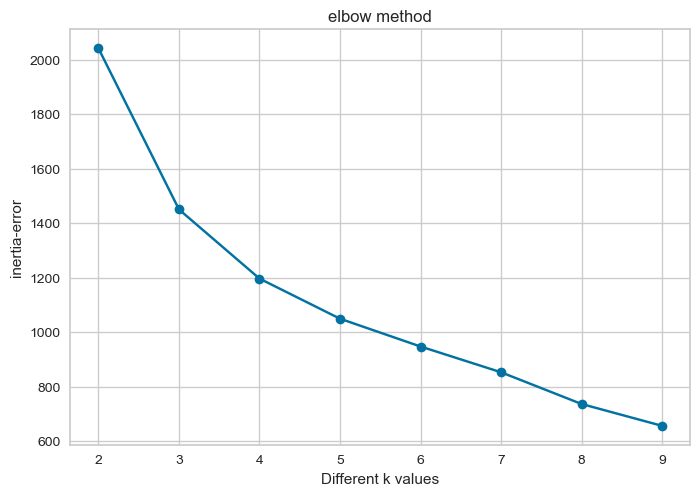

In [1554]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
# ilk sert düşüşün durduğu nokta

-- According to elbow graph best K paramater is 4

In [1555]:
ssd # This is a value that shows us differences between clusters like hypotenis :)

[2041.1816173174104,
 1449.8691348496664,
 1196.0485786018533,
 1048.8062300373267,
 946.7840808630723,
 852.2488913390827,
 735.807180810022,
 655.5968163492853]

In [1556]:
pd.Series(ssd).diff()

0           NaN
1   -591.312482
2   -253.820556
3   -147.242349
4   -102.022149
5    -94.535190
6   -116.441711
7    -80.210364
dtype: float64

In [1557]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,591.312482
3,253.820556
4,147.242349
5,102.022149
6,94.535190
7,116.441711
8,80.210364


<AxesSubplot:>

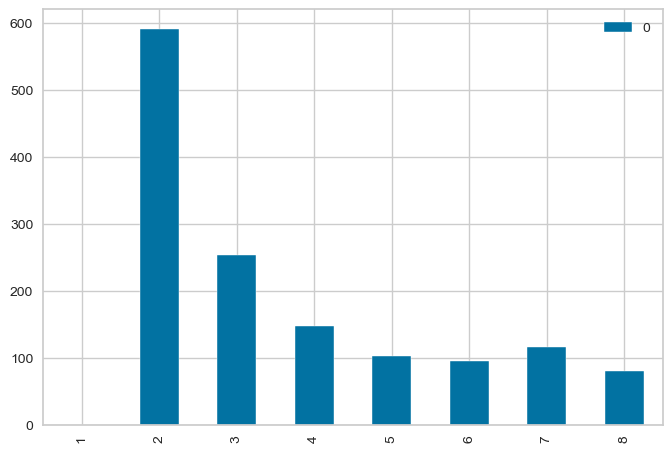

In [1558]:
df_diff.plot(kind='bar') 

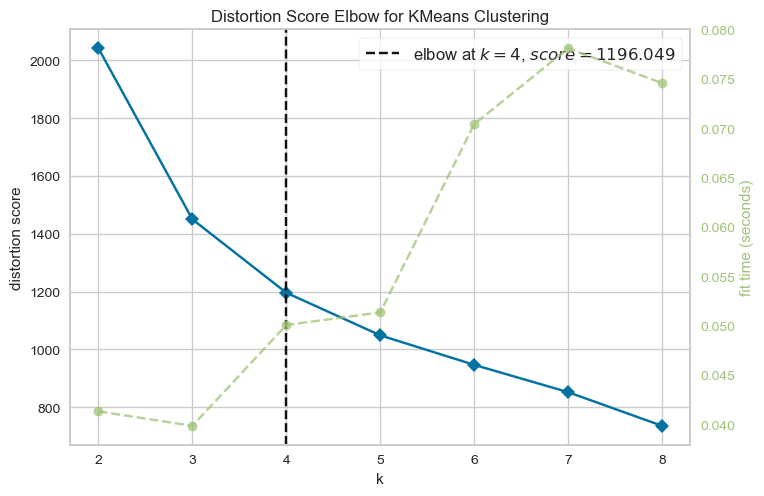

In [1559]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

-- yellow birrick show us which values is good for clustering 
-- in here 4 is good for cluster

## Silhouette analysis

In [1560]:
from sklearn.metrics import silhouette_score

In [1561]:
silhouette_score(X, K_means_model.labels_)

0.40494126063206737

In [1562]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.8489142240401718
For n_clusters=3, the silhouette score is 0.8186422373548907
For n_clusters=4, the silhouette score is 0.4845213265864185
For n_clusters=5, the silhouette score is 0.5129368418912758
For n_clusters=6, the silhouette score is 0.4391671767501831
For n_clusters=7, the silhouette score is 0.4638403521829421
For n_clusters=8, the silhouette score is 0.40494126063206737


### Model Building and label visualisation

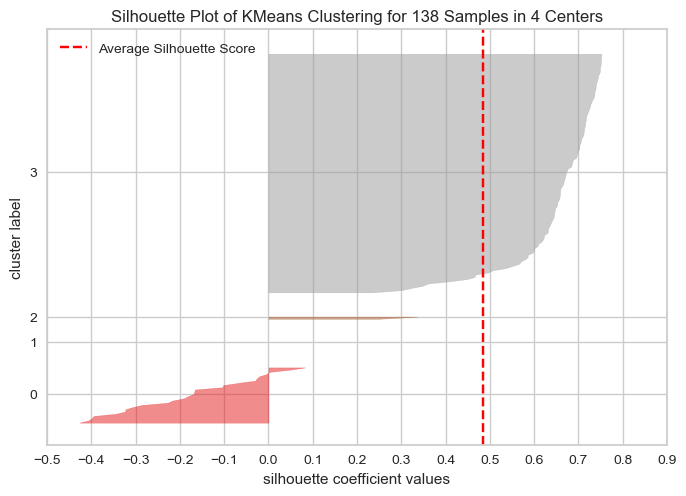

In [1563]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [1564]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3,
       3, 0, 0, 3, 3, 3], dtype=int32)

-- 

In [1565]:
model.inertia_

1196.0485786018533

In [1566]:
model.labels_

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3,
       3, 0, 0, 3, 3, 3], dtype=int32)

In [1567]:
cluster = model.labels_

In [1572]:
value_df["cluster"]=pd.DataFrame(cluster)

<AxesSubplot:xlabel='Aircraft Strength value', ylabel='Navy Fleet Strengths value'>

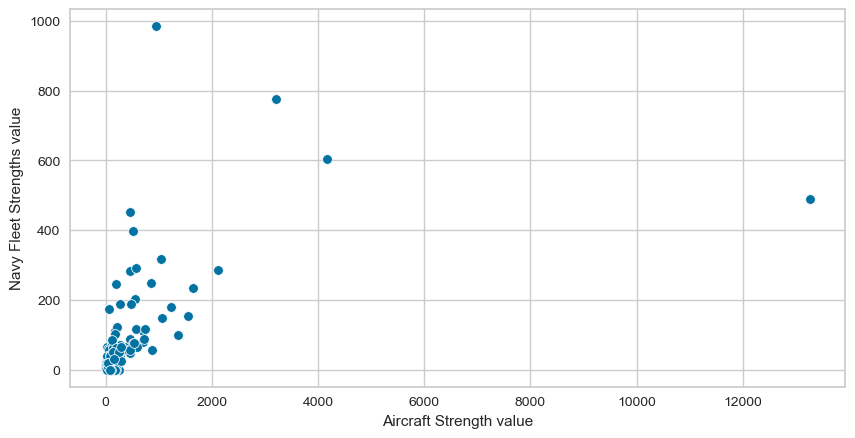

In [1573]:
plt.figure(figsize=(10,5))
sns.scatterplot(value_df["Aircraft Strength value"], 
                value_df["Navy Fleet Strengths value"])

In [1574]:
value_df.columns

Index(['index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'External Debt value',
       'Airport Totals value', 'Total Coastline Coverage value',
       'Total Waterway Coverage value', 'Total Border Coverage value',
       'defense spending budget values', 'Oil Production values',
       'Oil Consumption values', 'Proven Oil Reserves values', 'cluster'],
      dtype='object')

In [1575]:
import plotly.express as px

In [1576]:
fig = px.scatter_3d(x=value_df["Aircraft Strength value"],
                   y=value_df["defense spending budget values"],
                   z=value_df["External Debt value"],
                   color=value_df.cluster,
                   labels = {"x": "Aircraft Strength value",
                             "y": "defense spending budget values",
                             "z": "External Debt value"},
                   hover_name=df["country"])

fig.show()

In [1577]:
value_df.sample().T

,123
index,1.240000e+02
Aircraft Strength value,1.470000e+02
Fighter/Interceptor Strength value,1.200000e+01
Attack Aircraft Strength value,0.000000e+00
Transport Aircraft Fleet Strength value,1.400000e+01
Trainer Aircraft Fleet value,2.900000e+01
Helicopter Fleet Strength value,9.200000e+01
Attack Helicopter Fleet Strength value,0.000000e+00
Tank Strength value,1.810000e+02
AFV/APC Strength value,8.780000e+02


In [1578]:
clusters = model.labels_

In [1579]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.719545,-0.104660,-0.355421,-0.008078,-0.002521,-0.345240,0.063544,-0.264231,-0.428199,-0.264092,...,-0.486280,-0.280709,-0.204411,-0.262975,-0.259460,0.151930,-0.029726,-0.347202,-0.316761,-0.280406
1,-1.694442,-0.300992,-0.355421,-0.273513,-0.328624,-0.345240,-0.260595,-0.264231,-0.428199,-0.374463,...,-0.486280,-0.277088,-0.236680,-0.243445,-0.329981,-0.572324,-0.204922,-0.347202,-0.316761,-0.276455
2,-1.669339,0.132405,0.093402,-0.039931,0.312713,0.017366,0.198603,0.199817,0.154596,0.904357,...,0.342197,-0.278851,-0.110084,-0.209133,-0.332476,0.254085,-0.014815,0.437777,-0.166705,0.006007
3,-1.644236,-0.076147,-0.041681,-0.082400,-0.002521,-0.149349,-0.054149,-0.109548,-0.177200,-0.350719,...,-0.486280,-0.259389,-0.094363,-0.176656,-0.253375,0.067415,-0.104277,0.654158,-0.316761,-0.086185
4,-1.619133,-0.131544,-0.250841,-0.199191,-0.230793,-0.078495,-0.104314,-0.264231,-0.183160,-0.324008,...,-0.486280,-0.165493,0.701623,0.006180,0.336841,0.969860,-0.146026,-0.059055,-0.000488,-0.229110


In [1580]:
df.head()

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Frigate Fleet Strength value,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,0.0,"2,84,00,00,000",43.0,0.0,1200.0,5987.0,12000000000,0,0,0
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,0.0,"9,50,50,00,000",4.0,362.0,41.0,691.0,250000000,0,0,168300000
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,5.0,"6,26,00,00,000",157.0,998.0,0.0,6734.0,13000000000,1306000,325000,12200000000
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,0.0,"42,08,00,00,000",176.0,1600.0,1300.0,5369.0,7000000000,1666000,0,8273000000
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,0.0,"2,14,90,00,00,000",1138.0,4989.0,11000.0,11968.0,4200000000,479400,685000,2185000000


In [1581]:
df["predicted_clusters"] = clusters

In [1582]:
df.head()

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,predicted_clusters
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,"2,84,00,00,000",43.0,0.0,1200.0,5987.0,12000000000,0,0,0,3
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,"9,50,50,00,000",4.0,362.0,41.0,691.0,250000000,0,0,168300000,3
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,"6,26,00,00,000",157.0,998.0,0.0,6734.0,13000000000,1306000,325000,12200000000,0
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,"42,08,00,00,000",176.0,1600.0,1300.0,5369.0,7000000000,1666000,0,8273000000,3
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,"2,14,90,00,00,000",1138.0,4989.0,11000.0,11968.0,4200000000,479400,685000,2185000000,3


In [1583]:
df.nunique()

country                                    138
Aircraft Strength value                    113
Fighter/Interceptor Strength value          63
Attack Aircraft Strength value              38
Transport Aircraft Fleet Strength value     49
Trainer Aircraft Fleet value                77
Helicopter Fleet Strength value             97
Attack Helicopter Fleet Strength value      45
Tank Strength value                        106
AFV/APC Strength value                     130
Self-Propelled Artillery Strength value     70
Towed Artillery Strength value              91
Rocket Projector Strength value             68
Navy Fleet Strengths value                  78
Aircraft Carrier Fleet Strength value        5
Submarine Fleet Strength value              20
Destroyer Fleet Strength value              11
Frigate Fleet Strength value                18
External Debt value                        138
Airport Totals value                       108
Total Coastline Coverage value             104
Total Waterwa

In [1584]:
df["Aircraft Carrier Fleet Strength value"].value_counts()

0.0     125
2.0       6
1.0       4
4.0       2
20.0      1
Name: Aircraft Carrier Fleet Strength value, dtype: int64

### Evaluate 

In [1585]:
from sklearn.metrics import adjusted_rand_score

In [1586]:
df_end = df
df_end

,country,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,predicted_clusters
0,Afghanistan,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,"2,84,00,00,000",43.0,0.0,1200.0,5987.0,12000000000,0,0,0,3
1,Albania,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,"9,50,50,00,000",4.0,362.0,41.0,691.0,250000000,0,0,168300000,3
2,Algeria,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,"6,26,00,00,000",157.0,998.0,0.0,6734.0,13000000000,1306000,325000,12200000000,0
3,Angola,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,"42,08,00,00,000",176.0,1600.0,1300.0,5369.0,7000000000,1666000,0,8273000000,3
4,Argentina,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,"2,14,90,00,00,000",1138.0,4989.0,11000.0,11968.0,4200000000,479400,685000,2185000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,...,"1,00,30,00,00,000",444.0,2800.0,7100.0,5267.0,745000000,2007000,575000,300900000000,0
134,Vietnam,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,"96,58,00,00,000",45.0,3444.0,17702.0,4616.0,5500000000,271400,525000,4400000000,0
135,Yemen,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,"7,06,80,00,000",57.0,1906.0,0.0,1601.0,1400000000,0,145000,3000000000,3
136,Zambia,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,"11,66,00,00,000",88.0,0,2250.0,6043.0,40000000,0,0,0,3


In [1587]:
adjusted_rand_score(df_end.country, df_end.predicted_clusters)

0.0

In [1588]:
value_df[value_df["cluster"] == 0]

,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster
2,3,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,6.260000e+09,157.0,998.0,0.0,6734.0,1.300000e+10,1306000.0,325000.0,1.220000e+10,0
6,7,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,...,1.714000e+12,480.0,25760.0,2000.0,66530.0,2.630000e+10,263000.0,1005000.0,1.821000e+09,0
17,18,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,1820.0,...,5.474000e+11,4093.0,7491.0,50000.0,16145.0,2.780000e+10,2622000.0,3020000.0,1.300000e+10,0
22,23,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,...,1.608000e+12,1467.0,202080.0,636.0,8893.0,2.250000e+10,3977000.0,2500000.0,1.697000e+11,0
27,28,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,595.0,...,1.246000e+11,836.0,3208.0,24725.0,6672.0,1.060000e+10,853600.0,300000.0,2.002000e+09,0
35,36,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,...,7.747000e+10,83.0,2450.0,3500.0,2612.0,1.120000e+10,589400.0,832000.0,4.400000e+09,0
40,41,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,6028.0,...,5.360000e+12,464.0,4853.0,8501.0,4072.0,4.150000e+10,0.0,1600000.0,7.235000e+07,0
43,44,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,4583.0,...,5.326000e+12,539.0,2389.0,7467.0,3694.0,5.000000e+10,0.0,2500000.0,1.454000e+08,0
45,46,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,3691.0,...,5.066000e+11,77.0,13676.0,6.0,1110.0,4.844000e+09,0.0,350000.0,1.000000e+07,0
49,50,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,8686.0,...,5.016000e+11,346.0,7000.0,14500.0,13888.0,6.100000e+10,733900.0,5000000.0,4.621000e+09,0


In [1589]:
value_df[value_df["cluster"] == 1]

,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster
130,131,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,...,1.791000e+13,13513.0,19924.0,41009.0,12048.0,7.500000e+11,9352000.0,20000000.0,3.652000e+10,1


In [1590]:
value_df[value_df["cluster"] == 1]


,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster
130,131,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,...,1.791000e+13,13513.0,19924.0,41009.0,12048.0,7.500000e+11,9352000.0,20000000.0,3.652000e+10,1


In [1591]:
value_df[value_df["cluster"] == 3]

,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster
0,1,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,2.840000e+09,43.0,0.0,1200.0,5987.0,1.200000e+10,0.0,0.0,0.000000e+00,3
1,2,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,9.505000e+09,4.0,362.0,41.0,691.0,2.500000e+08,0.0,0.0,1.683000e+08,3
3,4,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,4.208000e+10,176.0,1600.0,1300.0,5369.0,7.000000e+09,1666000.0,0.0,8.273000e+09,3
4,5,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,2.149000e+11,1138.0,4989.0,11000.0,11968.0,4.200000e+09,479400.0,685000.0,2.185000e+09,3
5,6,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,...,1.041000e+10,11.0,0.0,0.0,1570.0,1.385000e+09,0.0,0.0,0.000000e+00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,50.0,0.0,7.0,9.0,16.0,13.0,0.0,78.0,463.0,...,2.837000e+10,133.0,660.0,1600.0,1591.0,4.950000e+09,0.0,0.0,0.000000e+00,3
132,133,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,1215.0,...,1.690000e+10,53.0,420.0,1100.0,6893.0,9.750000e+08,0.0,142000.0,5.940000e+08,3
135,136,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,7.068000e+09,57.0,1906.0,0.0,1601.0,1.400000e+09,0.0,145000.0,3.000000e+09,3
136,137,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,1.166000e+10,88.0,0.0,2250.0,6043.0,4.000000e+07,0.0,0.0,0.000000e+00,3


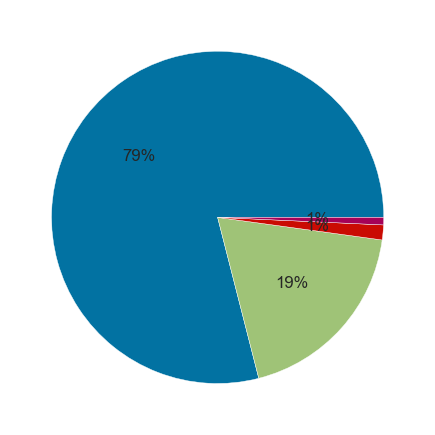

In [1592]:
plt.pie(value_df["cluster"].value_counts(),autopct='%.0f%%');

## Hierarchical Clustering

In [1593]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [1594]:
hc_ward = linkage(y = X, method = "ward")  
hc_complete = linkage(X, "complete")      
hc_average = linkage(X, "average")         
hc_single = linkage(X, "single")  

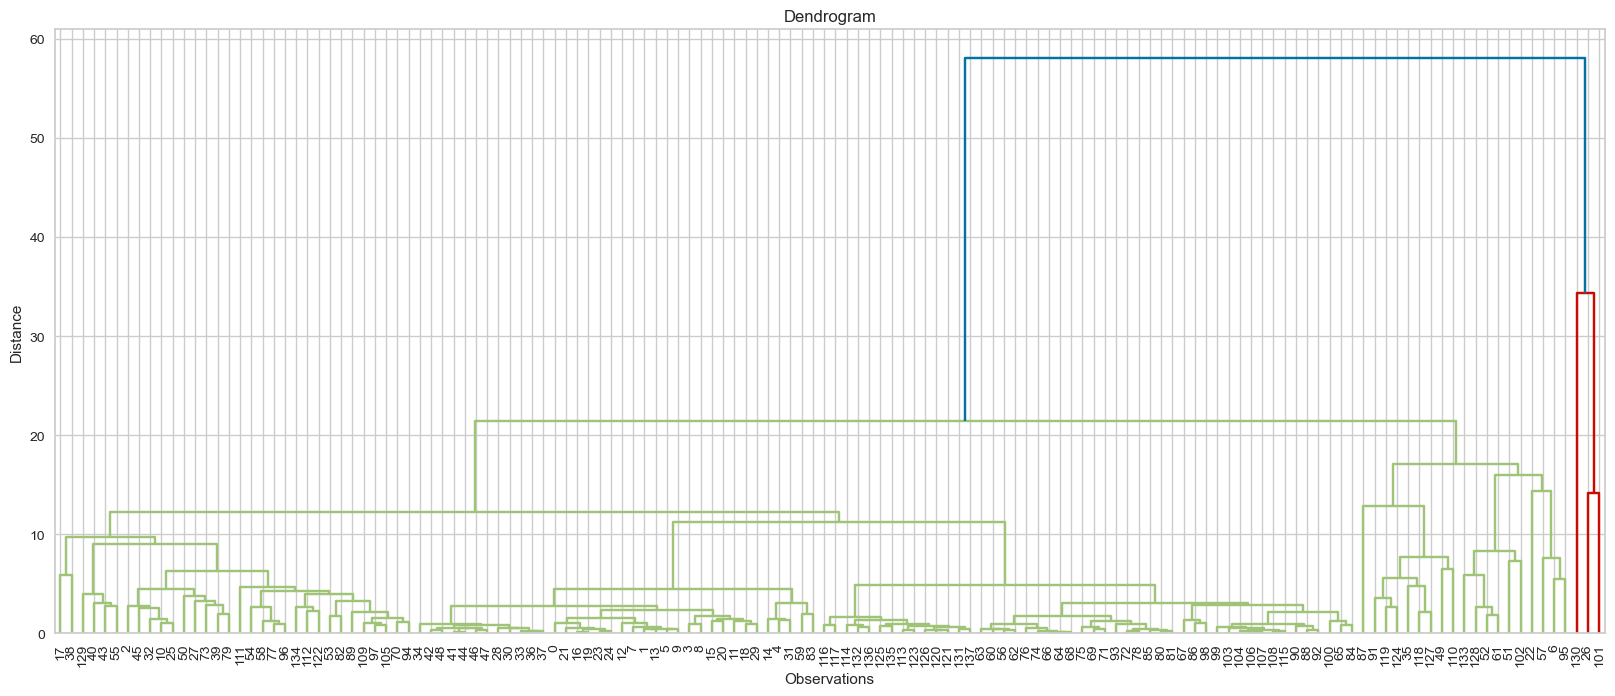

In [1595]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);   

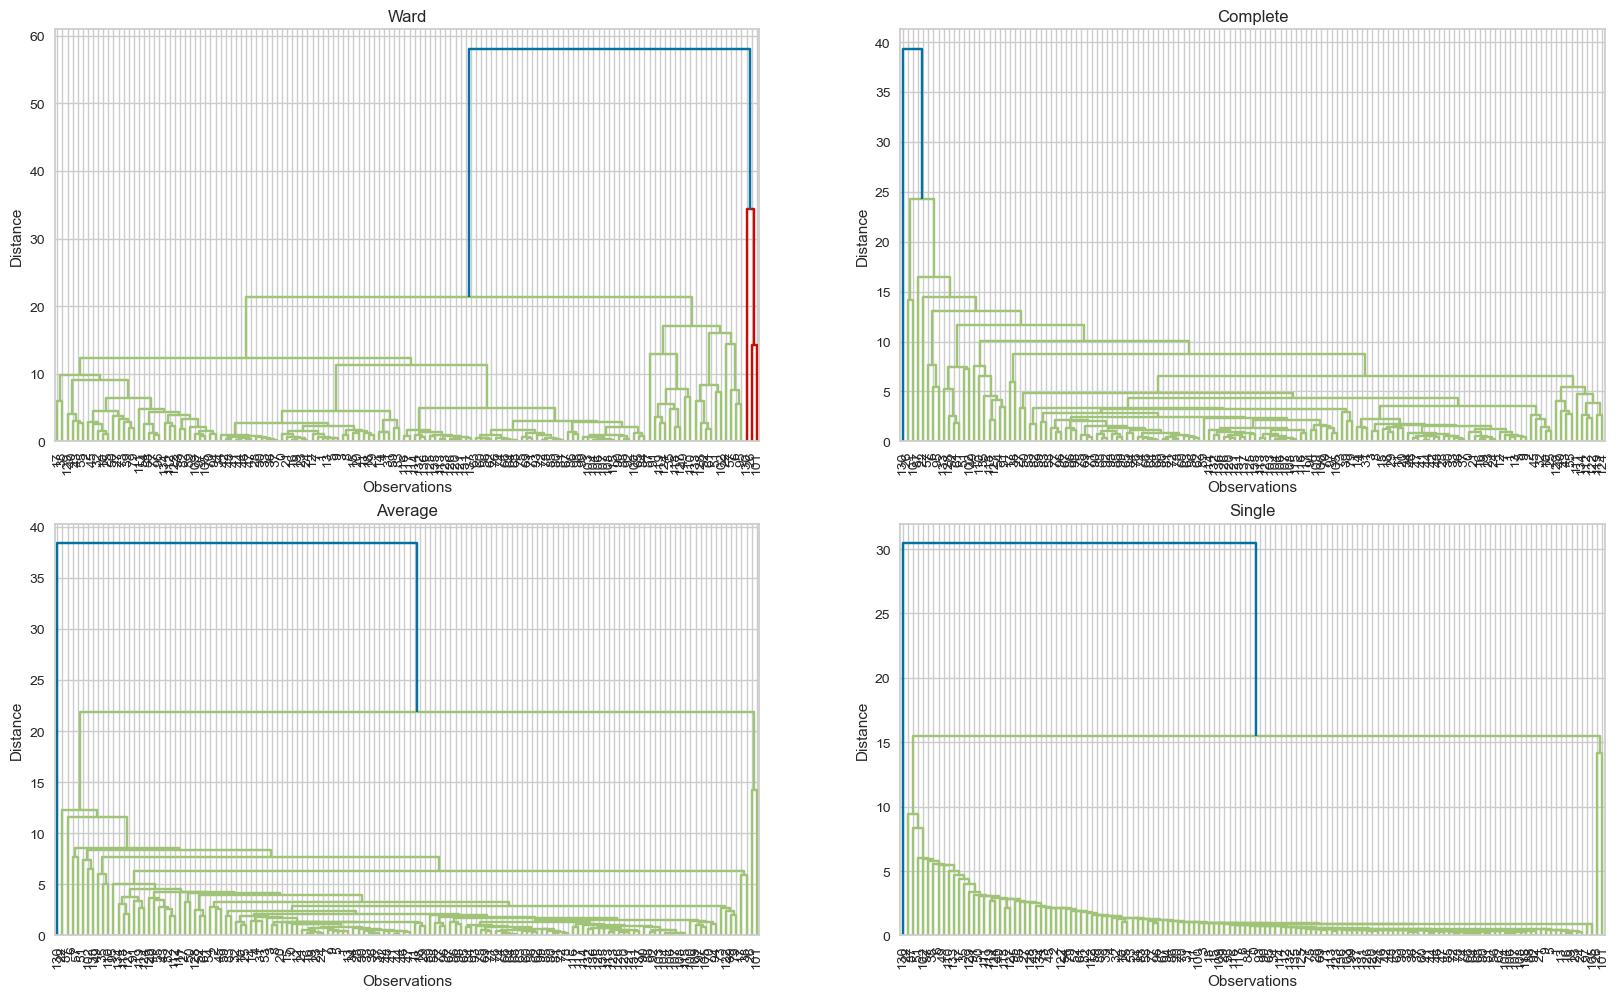

In [1596]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

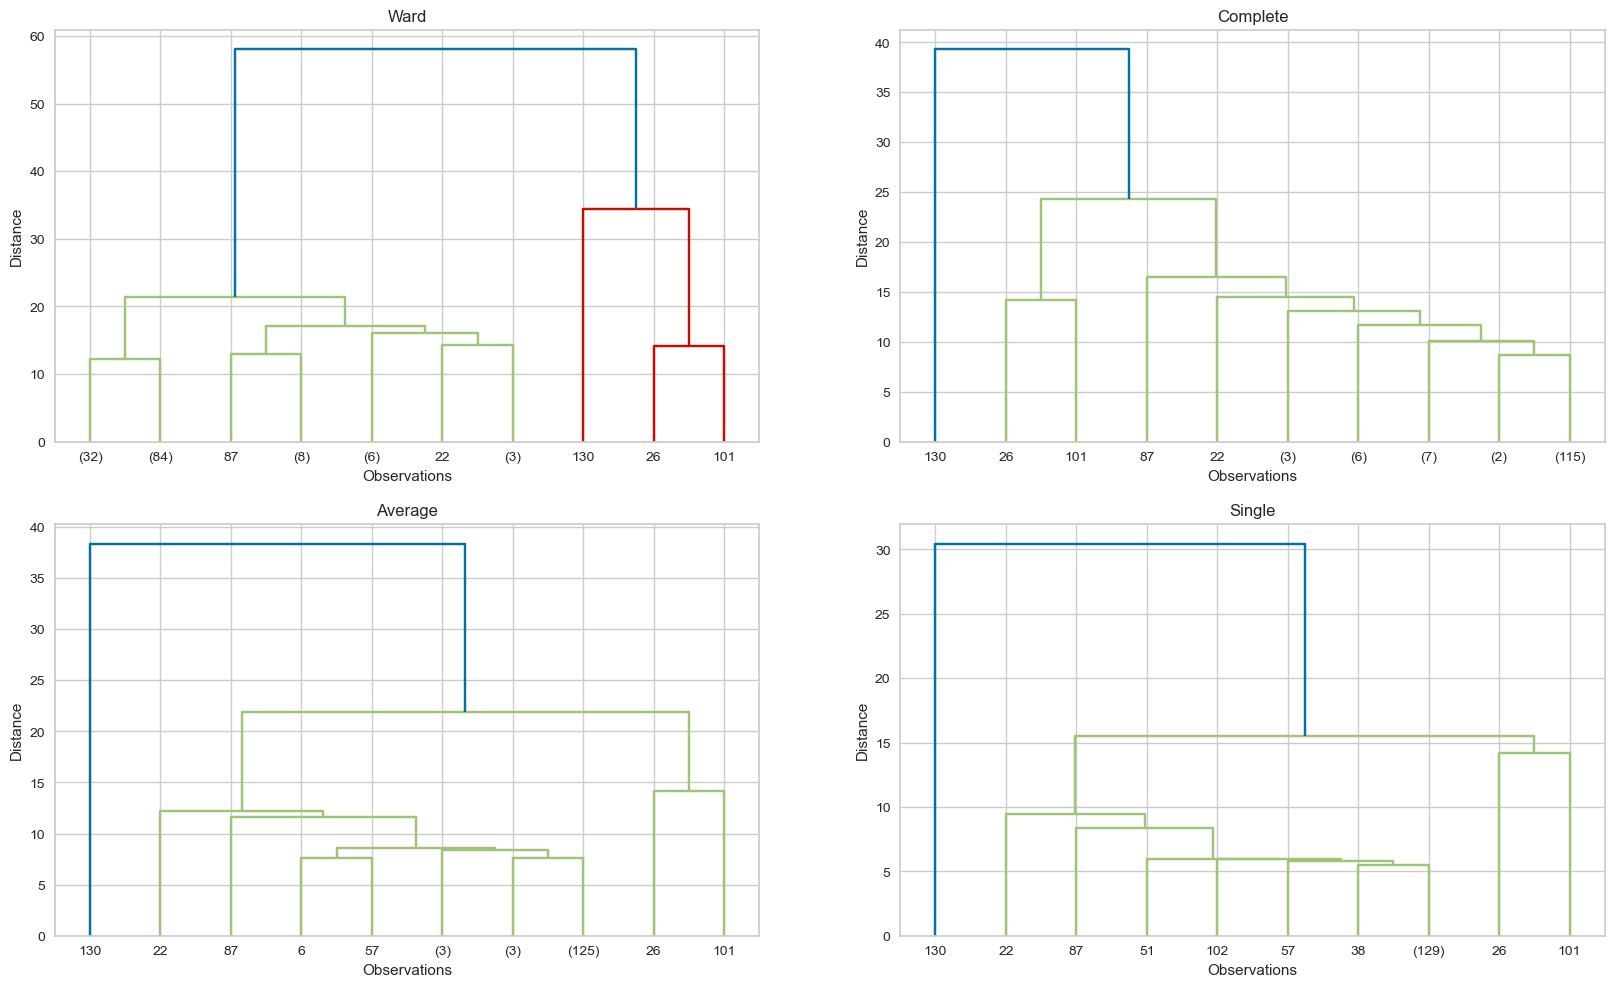

In [1597]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [1598]:
from sklearn.cluster import AgglomerativeClustering

In [1599]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.8489142240401718
Silhouette Score for 3 clusters: 0.8186422373548907
Silhouette Score for 4 clusters: 0.5246895219116218
Silhouette Score for 5 clusters: 0.5199510640747634
Silhouette Score for 6 clusters: 0.5172291298232902
Silhouette Score for 7 clusters: 0.5215066583389744
Silhouette Score for 8 clusters: 0.5179543409173853
Silhouette Score for 9 clusters: 0.5023968907605002


In [1600]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 2, 3,
       3, 0, 3, 3, 3, 3])

In [1601]:
model1.labels_  

array([3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 2, 3,
       3, 0, 3, 3, 3, 3])

In [1602]:
value_df["cluster_1"] = model1.labels_

In [1603]:
fig = px.scatter_3d(x=value_df["Aircraft Strength value"],
                   y=value_df["defense spending budget values"],
                   z=value_df["External Debt value"],
                   color=value_df.cluster_1,
                   labels = {"x": "Aircraft Strength value",
                             "y": "defense spending budget values",
                             "z": "External Debt value"},
                   hover_name=df["country"])

fig.show()

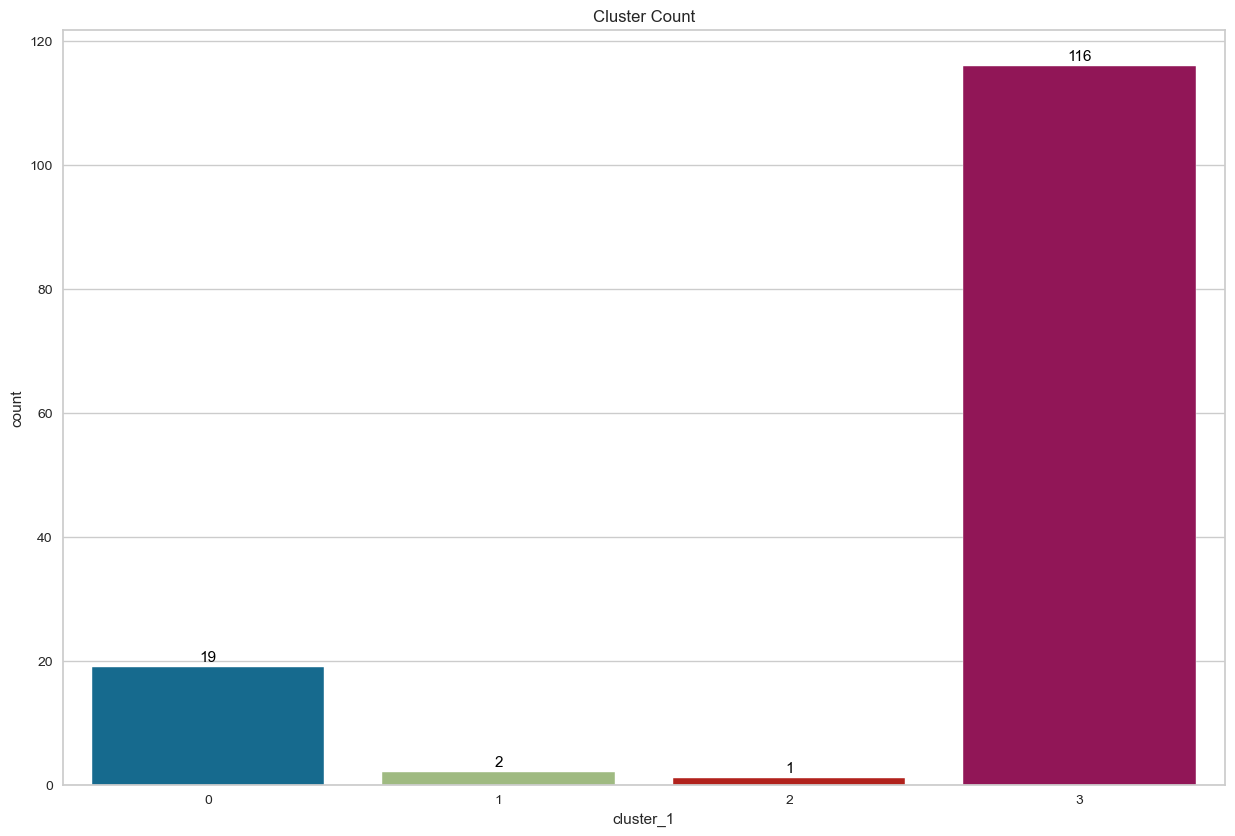

In [1604]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [1605]:
value_df[value_df["cluster_1"] == 0]

,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster,cluster_1
6,7,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,...,480.0,25760.0,2000.0,66530.0,2.630000e+10,263000.0,1005000.0,1.821000e+09,0,0
22,23,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,1973.0,...,1467.0,202080.0,636.0,8893.0,2.250000e+10,3977000.0,2500000.0,1.697000e+11,0,0
35,36,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,11700.0,...,83.0,2450.0,3500.0,2612.0,1.120000e+10,589400.0,832000.0,4.400000e+09,0,0
49,50,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,8686.0,...,346.0,7000.0,14500.0,13888.0,6.100000e+10,733900.0,5000000.0,4.621000e+09,0,0
51,52,509.0,155.0,23.0,62.0,94.0,100.0,12.0,2056.0,4300.0,...,319.0,2440.0,850.0,5894.0,1.960000e+10,4469000.0,2000000.0,1.584000e+11,0,0
52,53,348.0,26.0,33.0,16.0,102.0,186.0,40.0,309.0,4739.0,...,102.0,58.0,5279.0,3809.0,1.730000e+09,4454000.0,825000.0,1.425000e+11,3,0
57,58,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,...,175.0,29751.0,1770.0,29020.0,4.900000e+10,0.0,4000000.0,4.412000e+07,0,0
61,62,85.0,27.0,0.0,2.0,13.0,40.0,16.0,367.0,745.0,...,7.0,499.0,0.0,475.0,6.831000e+09,2753000.0,345000.0,1.015000e+11,3,0
87,88,949.0,458.0,114.0,4.0,169.0,204.0,20.0,6045.0,10000.0,...,82.0,2495.0,2250.0,1607.0,1.600000e+09,0.0,0.0,0.000000e+00,0,0
91,92,1372.0,356.0,90.0,49.0,513.0,346.0,56.0,2200.0,7330.0,...,151.0,1046.0,25220.0,7257.0,1.140000e+10,0.0,575000.0,3.506000e+08,0,0


In [1606]:
value_df[value_df["cluster_1"] == 1]


,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster,cluster_1
26,27,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,33000.0,...,507.0,14500.0,110000.0,22457.0,2.370000e+11,3838000.0,13500000.0,2.562000e+10,2,1
101,102,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,27038.0,...,1218.0,37653.0,102000.0,22408.0,4.800000e+10,10580000.0,3225000.0,8.000000e+10,2,1


In [1607]:
value_df[value_df["cluster_1"] == 2]

,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster,cluster_1
130,131,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,39253.0,...,13513.0,19924.0,41009.0,12048.0,7.500000e+11,9352000.0,20000000.0,3.652000e+10,1,2


In [1608]:
value_df[value_df["cluster_1"] == 3]


,index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,defense spending budget values,Oil Production values,Oil Consumption values,Proven Oil Reserves values,cluster,cluster_1
0,1,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,...,43.0,0.0,1200.0,5987.0,1.200000e+10,0.0,0.0,0.000000e+00,3,3
1,2,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,...,4.0,362.0,41.0,691.0,2.500000e+08,0.0,0.0,1.683000e+08,3,3
2,3,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,...,157.0,998.0,0.0,6734.0,1.300000e+10,1306000.0,325000.0,1.220000e+10,0,3
3,4,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,...,176.0,1600.0,1300.0,5369.0,7.000000e+09,1666000.0,0.0,8.273000e+09,3,3
4,5,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,...,1138.0,4989.0,11000.0,11968.0,4.200000e+09,479400.0,685000.0,2.185000e+09,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,1215.0,...,53.0,420.0,1100.0,6893.0,9.750000e+08,0.0,142000.0,5.940000e+08,3,3
134,135,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,...,45.0,3444.0,17702.0,4616.0,5.500000e+09,271400.0,525000.0,4.400000e+09,0,3
135,136,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,...,57.0,1906.0,0.0,1601.0,1.400000e+09,0.0,145000.0,3.000000e+09,3,3
136,137,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,...,88.0,0.0,2250.0,6043.0,4.000000e+07,0.0,0.0,0.000000e+00,3,3


### Evaluate 

In [1609]:
from sklearn.metrics.cluster import adjusted_rand_score

In [1610]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_1)}') 

Silhouette Score(n=4): 0.5246895219116218


-- According this analysis our silhouette score is 0.52 for 4 clustering.